In [1]:
import warnings; warnings.filterwarnings('ignore')

from time import time

import numpy as np
import pandas as pd
from scipy import optimize as opt
from scipy import io as spio

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style="darkgrid")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# load data
mat=spio.loadmat('machine-learning-ex3/ex3/ex3data1.mat')
X,y=mat['X'],mat['y']
y[y==10]=0 # convert label '10' back to 0 as 0 is labeled '10' in dataset 

mat=spio.loadmat('machine-learning-ex3/ex3/ex3weights.mat')
theta1,theta2=mat['Theta1'],mat['Theta2']

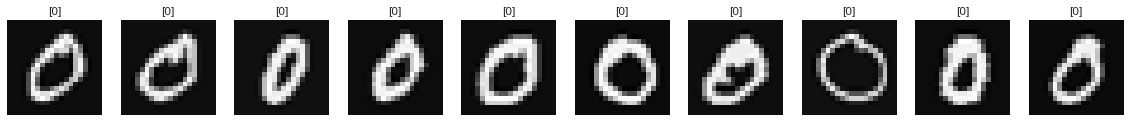

In [3]:
# visualize the data (first 10 samples)
width,height=20,20
fig=plt.figure(figsize=(20,20))
for i in range(10): 
    square=X[i].reshape(width,height).T
    ax=fig.add_subplot(1,10,i+1,xticks=[],yticks=[])
    ax.imshow(square,cmap='gray')
    ax.set_title(str(y[i]))

In [4]:
# construct sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# construct regularized cost function and gradient
def cost_ftn(theta,X,y,alpha):
    sample_size=X.shape[0]
    lc=np.dot(X,theta)
    cost=-sum(y*np.log(sigmoid(lc))+(1-y)*np.log(1-sigmoid(lc)))/sample_size\
    +alpha/(2*sample_size)*np.dot(theta[1:].T,theta[1:])
    return cost.ravel()

def gradient(theta,X,y,alpha):
    sample_size=X.shape[0]
    lc=np.dot(X,theta)
    delta=sigmoid(lc)-y
    theta=np.insert(theta[1:],0,0).reshape(len(theta),1)
    gradient=np.dot(X.T,delta)/sample_size+alpha/sample_size*theta
    return gradient.ravel()

In [5]:
# test cost function and gradient
theta_test=np.array([-2,-1,1,2]).reshape(4,1)
X_test=np.array(range(1,16)).reshape(3,5).T/10
X_test=np.insert(X_test,0,1,axis=1)
y_test=np.array([1,0,1,0,1]).reshape(5,1)
alpha_test=3
cost_test=cost_ftn(theta_test,X_test,y_test,alpha_test)
gradient_test=gradient(theta_test,X_test,y_test,alpha_test)

print("Cost at test theta: {0:.3f}".format(np.asscalar(cost_test)))
print("Gradient at test theta:")
print(np.round(gradient_test,3))

Cost at test theta: 2.535
Gradient at test theta:
[ 0.147 -0.549  0.725  1.398]


In [6]:
# sklearn LogisticRegression API implements multi-class as one-vs-all
lr=LogisticRegression(solver='newton-cg') # slight difference in results due to 'fmincg', not 'fminnc' used in MatLab
lr.fit(X,y)
predicted_prb=lr.predict_proba(X)
predicted=lr.predict(X)

print('Predicted prob vector for sample [0]:')
print(np.round(predicted_prb[0],3))
print('Predicted digit for sample [0]: {}'.format(predicted[0]))
print('\nAccuracy: {0:.1f}%'.format(accuracy_score(y,predicted)*100))

Predicted prob vector for sample [0]:
[ 0.996  0.     0.001  0.     0.     0.002  0.     0.     0.     0.002]
Predicted digit for sample [0]: 0

Accuracy: 94.5%


In [7]:
# one-vs-all classification approach deconstructed; results same as above
predicted_prb=np.ndarray(shape=(X.shape[0],10))
for i in range(10):
    y_bin=(y==i).astype(int)
    lr.fit(X,y_bin)
    predicted_prb[:,i]=lr.predict_proba(X)[:,1]
predicted=np.argmax(predicted_prb,axis=1)

print('Predicted prob vector for sample [0]:')
print(np.round(predicted_prb[0],3))
print('Predicted digit for sample [0]: {}'.format(predicted[0]))
print('\nAccuracy: {0:.1f}%'.format(accuracy_score(y,predicted)*100))

Predicted prob vector for sample [0]:
[ 0.996  0.     0.001  0.     0.     0.002  0.     0.     0.     0.002]
Predicted digit for sample [0]: 0

Accuracy: 94.5%


In [8]:
# prediction using neural networks with previously trained weights 
X_bias=np.insert(X,0,1,axis=1)
units2=sigmoid(np.dot(X_bias,theta1.T))
units2=np.insert(units2,0,1,axis=1)
predicted_prb=sigmoid(np.dot(units2,theta2.T))
predicted=np.argmax(predicted_prb,axis=1)+1
predicted[predicted==10]=0

print('Predicted prob vector for sample [0]:')
print(np.round(predicted_prb[0],3))
print('Predicted digit for sample [0]: {}'.format(predicted[0]))
print('\nAccuracy: {0:.1f}%'.format(accuracy_score(y,predicted)*100))

Predicted prob vector for sample [0]:
[ 0.     0.002  0.003  0.     0.009  0.004  0.006  0.     0.006  0.996]
Predicted digit for sample [0]: 0

Accuracy: 97.5%
